# Time Series School District Poverty

In this notebook, we load and use a timeseries data set from the U.S. Census.
It is easy to tell that a data set is a timeseries dataset because it's
name begins with `"timeseries/"`. So the data set we use in this notebook,
`"timeseries/poverty/saipe/schdist"` is clearly a timeseries data set
and `"acs/acs5"` is not.

When a dataset is a time series, it means that we don't
query for a specific year like we do with survey data like the
ACS. Instead, when we download it one call gets us multiple years of 
data at once.

When working with a timeseries data set, we don't specify
a year when we call `censusdis.data.download`. Instead, we use the
literal `"timeseries"`. The reason is that the dataset we are using
is organized as a time series designed to be queried for all years with
one call, rather than for a single year in a single call. 

In [1]:
# So we can run from within the censusdis project and find the packages we need.
import os
import sys

sys.path.append(
    os.path.join(os.path.abspath(os.path.join(os.path.curdir, os.path.pardir)))
)

## Imports and Configuration

In [2]:
import censusdis.data as ced

from censusdis.states import STATE_NJ

### The timeseries data set we will use.

See https://www.census.gov/data/developers/data-sets/Poverty-Statistics.html for more details.

In [3]:
DATASET = "timeseries/poverty/saipe/schdist"

### School districts in and around the Oranges in NJ

In [4]:
SD_UNIFIED_EO = "04230"
SD_UNIFIED_EWR = "11340"
SD_UNIFIED_IRV = "07680"
SD_UNIFIED_MB = "10200"
SD_UNIFIED_MC = "10560"
SD_UNIFIED_OC = "12270"
SD_UNIFIED_SOMA = "15330"
SD_UNIFIED_UNT = "16500"
SD_UNIFIED_WO = "17610"

SD_UNIFIED_ALL = [
    SD_UNIFIED_EO,
    SD_UNIFIED_EWR,
    SD_UNIFIED_IRV,
    SD_UNIFIED_MB,
    SD_UNIFIED_MC,
    SD_UNIFIED_OC,
    SD_UNIFIED_SOMA,
    SD_UNIFIED_UNT,
    SD_UNIFIED_WO,
]

### The variables in the dataset

In [5]:
df_variables = ced.variables.all_variables(DATASET, "timeseries", None)

df_variables

,YEAR,DATASET,GROUP,VARIABLE,LABEL,SUGGESTED_WEIGHT,VALUES
0,timeseries,timeseries/poverty/saipe/schdist,N/A,GEOCAT,"Summary Level (950 Elementary, 960 Secondary, ...",NaN,"{'980': 'Administrative', '970': 'Unified', '9..."
1,timeseries,timeseries/poverty/saipe/schdist,N/A,GEOID,Combined codes for the reference geography,NaN,None
2,timeseries,timeseries/poverty/saipe/schdist,N/A,GRADE,Grade Range of District,NaN,None
3,timeseries,timeseries/poverty/saipe/schdist,N/A,LEAID,School District ID,NaN,None
4,timeseries,timeseries/poverty/saipe/schdist,N/A,SAEPOV5_17RV_PT,Relevant Age 5 to 17 in Families in Poverty,NaN,{'0': 'Relevant Age 5 to 17 in Families in Pov...
5,timeseries,timeseries/poverty/saipe/schdist,N/A,SAEPOV5_17V_PT,Relevant Age 5 to 17 Population,NaN,{'0': 'Relevant Age 5 to 17 Population'}
6,timeseries,timeseries/poverty/saipe/schdist,N/A,SAEPOVALL_PT,Total Population,NaN,{'0': 'Total Population'}
7,timeseries,timeseries/poverty/saipe/schdist,N/A,SAEPOVRAT5_17RV_PT,Relevant Age 5 to 17 Poverty Ratio Estimate,NaN,None
8,timeseries,timeseries/poverty/saipe/schdist,N/A,SD_NAME,District Name,NaN,None
9,timeseries,timeseries/poverty/saipe/schdist,N/A,STATE,State Fips Code,NaN,None


### The variables we want

In [6]:
variables = ["YEAR", "SD_NAME", "SAEPOVRAT5_17RV_PT"]

In [7]:
gdf_ts = ced.download(
    DATASET,
    "timeseries",
    variables,
    state=STATE_NJ,
    school_district_unified=SD_UNIFIED_ALL,
    with_geometry=True,
)

gdf_ts

,STATE,SCHOOL_DISTRICT_UNIFIED,YEAR,SD_NAME,SAEPOVRAT5_17RV_PT,geometry
0,34,04230,1995,EAST ORANGE,28.8,None
1,34,07680,1995,IRVINGTON TOWNSHIP,20.6,None
2,34,10200,1995,MILLBURN TWP,1.6,None
3,34,10560,1995,MONTCLAIR TOWN,7.3,None
4,34,11340,1995,NEWARK CITY,42.3,None
...,...,...,...,...,...,...
220,34,11340,2021,Newark City School District,28.8,"POLYGON ((-74.25136 40.73753, -74.24975 40.738..."
221,34,12270,2021,Orange City Township School District,22.9,"POLYGON ((-74.25429 40.76006, -74.25290 40.761..."
222,34,15330,2021,South Orange-Maplewood School District,4.1,"POLYGON ((-74.29266 40.75272, -74.29214 40.756..."
223,34,16500,2021,Union Township School District,8.1,"POLYGON ((-74.31176 40.69007, -74.30893 40.690..."


## A Map of the Area

Notice that we used the `with_geometry=True` argument above. The issue is that maps
change over time. A school district my grow or shrink over time. The same is true
for other geographies, like metro areas. For this reason, rows representing the same
school district in different years each have their own value in the `geometry`
column. 

You may also notice that some of the row have `None` for their `geometry`.
This is because maps are not available for every geography in every year, especially
before 2010. Rather than raise an exception when this happens for a row, we simply
put `None` in that row. This is in contrast to the non-timeseries case where if we
cannot find a map we raise a `MapException` explaining what we looked for and could
not find.

If we want to plot a map, we need to pick a year. Usually we will pick the most recent
one, but you might choose another for any of a variety of reasons.

In [8]:
map_year = 2021

gdf_map = gdf_ts[gdf_ts["YEAR"] == map_year]

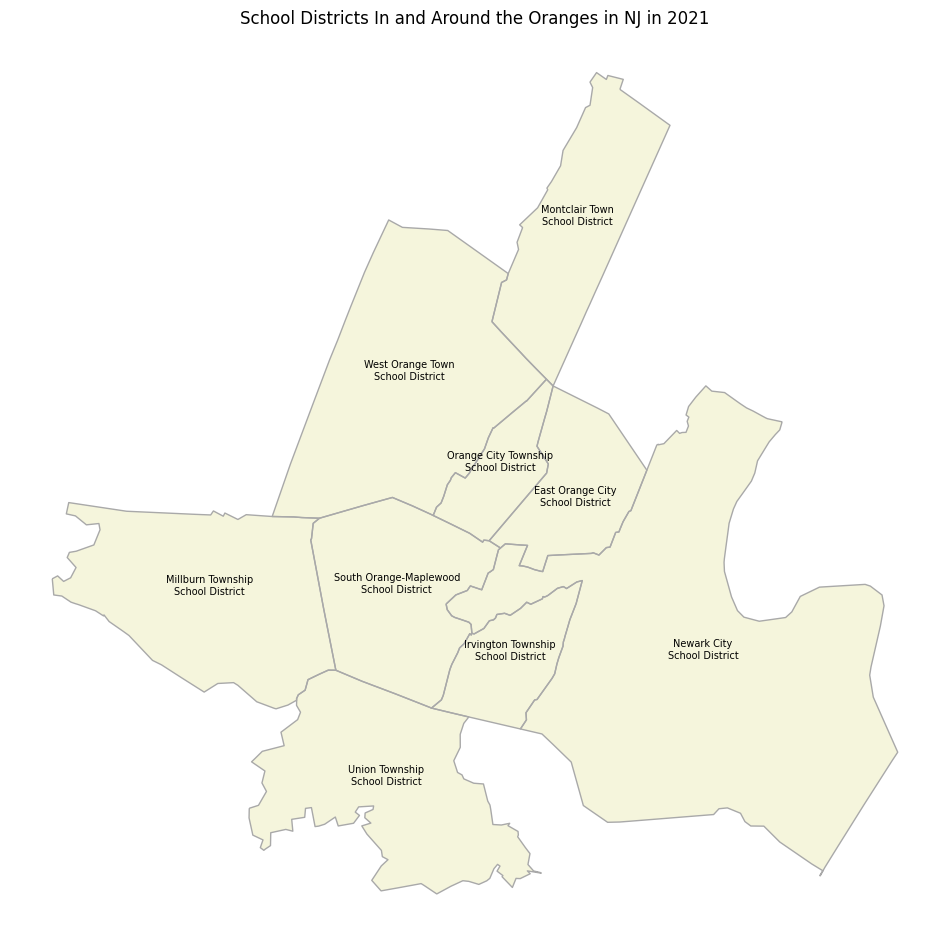

In [9]:
from adjustText import adjust_text

ax = gdf_map.plot(color="beige", figsize=(12, 12))
ax = gdf_map.boundary.plot(ax=ax, color="darkgrey", linewidth=1)

texts = []

for _, row in gdf_map.iterrows():
    centroid = row["geometry"].centroid
    texts.append(
        ax.text(
            centroid.x,
            centroid.y,
            row["SD_NAME"]
            .split(",")[0]
            .replace(" School District", "\nSchool District"),
            ha="center",
            fontsize=7,
        )
    )

adjust_text(texts, autoalign="y", force_points=(0, 0))

ax.axis("off")

ax.set_title(f"School Districts In and Around the Oranges in NJ in {map_year}")

None

## Plotting the Time Series

Now that we have visually verified that the data covers the regions we are interested in,
it's time to look at the actual time series data. 

First, we will normalize to the most recent name of each school district, since
the names in the data have changed over the years (mostly a matter of capitalization
and use of abbreviations).

In [10]:
gdf_ts["School District"] = gdf_ts["SCHOOL_DISTRICT_UNIFIED"].map(
    {
        district: df_district[df_district["YEAR"] == max(df_district["YEAR"])][
            "SD_NAME"
        ].iloc[0]
        for district, df_district in gdf_ts.groupby("SCHOOL_DISTRICT_UNIFIED")
    },
)

gdf_ts

,STATE,SCHOOL_DISTRICT_UNIFIED,YEAR,SD_NAME,SAEPOVRAT5_17RV_PT,geometry,School District
0,34,04230,1995,EAST ORANGE,28.8,None,East Orange City School District
1,34,07680,1995,IRVINGTON TOWNSHIP,20.6,None,Irvington Township School District
2,34,10200,1995,MILLBURN TWP,1.6,None,Millburn Township School District
3,34,10560,1995,MONTCLAIR TOWN,7.3,None,Montclair Town School District
4,34,11340,1995,NEWARK CITY,42.3,None,Newark City School District
...,...,...,...,...,...,...,...
220,34,11340,2021,Newark City School District,28.8,"POLYGON ((-74.25136 40.73753, -74.24975 40.738...",Newark City School District
221,34,12270,2021,Orange City Township School District,22.9,"POLYGON ((-74.25429 40.76006, -74.25290 40.761...",Orange City Township School District
222,34,15330,2021,South Orange-Maplewood School District,4.1,"POLYGON ((-74.29266 40.75272, -74.29214 40.756...",South Orange-Maplewood School District
223,34,16500,2021,Union Township School District,8.1,"POLYGON ((-74.31176 40.69007, -74.30893 40.690...",Union Township School District


Now we can plot. We'll pivot the data so that the year is the index and we have one column for each school district.
This will produce a nice time series plot.

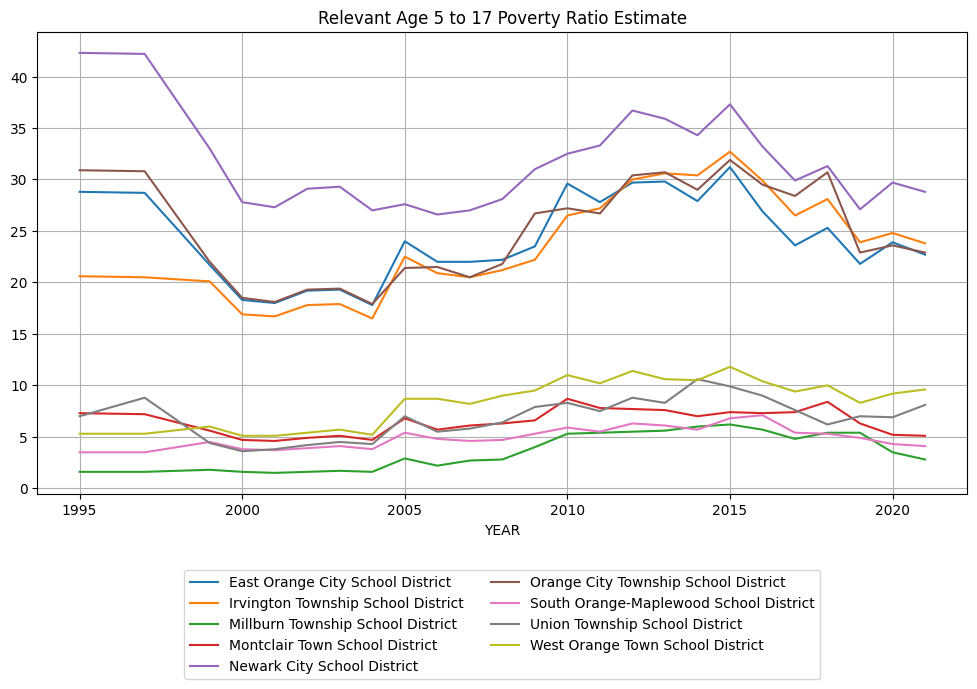

In [11]:
ax = gdf_ts.pivot(
    index="YEAR", columns="School District", values="SAEPOVRAT5_17RV_PT"
).plot(figsize=(12, 6))

ax.grid(True)

ax.set_title(
    df_variables[df_variables.VARIABLE == "SAEPOVRAT5_17RV_PT"]["LABEL"].iloc[0]
)

ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncols=2)

None